<a href="https://colab.research.google.com/github/bdbiworkshops/analysis-nlp/blob/main/AnalysisWorkshop3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis Workshop 3: NLP and Word2Vec!

In this workshop, we'll go over Natural Language Processing (NLP) algorithms at a high level and then implement one of the foundational algorithms of NLP, Word2Vec.

## Libraries and Tools
If you need to brush up on some machine learning and numpy + pandas fundamentals, check out our first tutorial using Sklearn here: https://github.com/bdbiworkshops/analysis-bees-vs-wasps/blob/main/AnalysisWorkshop1.ipynb

For an intro to neural networks using PyTorch, see our second workshop: https://github.com/bdbiworkshops/analysis-intro-to-pytorch/blob/main/AnalysisWorkshop2.ipynb
<br><br>
For today's workshop, we will be using 2 Python NLP libraries, nltk (Natural Language Toolkit) and gensim (unsupervised machine learning library).

Here's a simplified construction of the Word2Vec algorithm: (https://towardsdatascience.com/a-word2vec-implementation-using-numpy-and-python-d256cf0e5f28)


## What's NLP?

NLP is a field of machine learning that is specifically focuses on understanding human language. This can take the form of summarizing text, word classification, generating text, generating transcripts from audio, and more.

Generally, NLP algorithms will attempt to look relationships between words in order to understand how to create and use them in a way that mimics human language. Some important points are:
<br><br>
1.) How are words constructed? What types of words follow these construction patterns?

  ex: words that end in -ing (walking, starting, typing) can be classified as a form of verbs

2.) What is the meaning of a given word? Given context, can the meaning of a word change?

3.) How can words be put together into a sentence?

4.) What is the meaning of a given sentence?

### How Do NLP Algorithms Work?

As we've seen in our other workshops, machine learning models can only directly process numeric vectors (such as numpy arrays, tensors, etc). Given any form of non-int data, we need to find a way to convert it to either an int or some form of int array. Some ways we've tried so far to get around that are:

- For image processing: converting images to arrays of grayscale values
- For strings with numbers in them: "2023" -> 2023
- For strings with numeric meaning: "November" -> 11
- For strings with no numbers/numerical representation: One-hot encoding

<br><br>

Different NLP models have different ways of going about this. One approach that some models utilize is Bag of Words: creates a table of all words from a given text, where each word is given a frequency score (similar to a hashmap/dictionary)

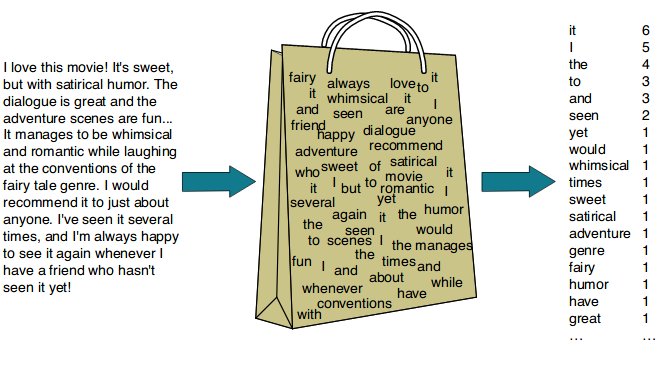

Problems with Bag of Words: meaning of parsed text is determined by frequency of words, not the meaning of the words themselves

Ex:


vocabulary: ["I", "was", "hungry", "she", "not"]


"I was hungry. She was hungry." -> [1, 2, 2, 1, 0] #LIVE

"I was not hungry. She was not hungry." -> [1, 2, 2, 1, 1] #LIVE

Using Bag of Words on these two sentences informs us that the sentences discuss similar content, but tells us nothing about the meaning of each sentence.

<br><br>
Another ex:


vocabulary: ["I", "was", "hungry", "she", "when", "can", "we", "eat"]

"I was hungry. She was hungry." -> [1, 2, 2, 1, 0, 0, 0, 0] #LIVE

"When can we eat?" -> [0, 0, 0, 0, 1, 1, 1, 1] #LIVE

Here we see that as the vocabulary gets larger, we end up with sentence vectors with more 0s (a concept called sparse vectors). This can take up a lot of memory and make it harder for models to process data.



##The Word2Vec Algorithm

A complex but better performing method of converting text for NLP is Word2Vec.

### How Does It Work?

Word2Vec is a 2 layer neural network that understands a word's meaning by analyzing surrounding words for context. Word similarity is calculated by Word2Vec by finding the dot product between the two word vectors. The output is expressed as cos(theta) where theta ranges from 0 to 90 (i.e. output values range from 0 to 1)

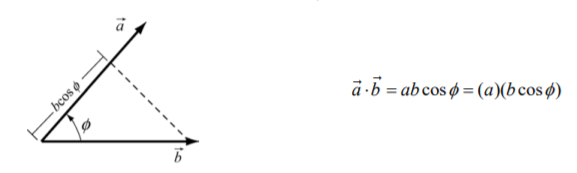

Comparing words similar to "Sweden":

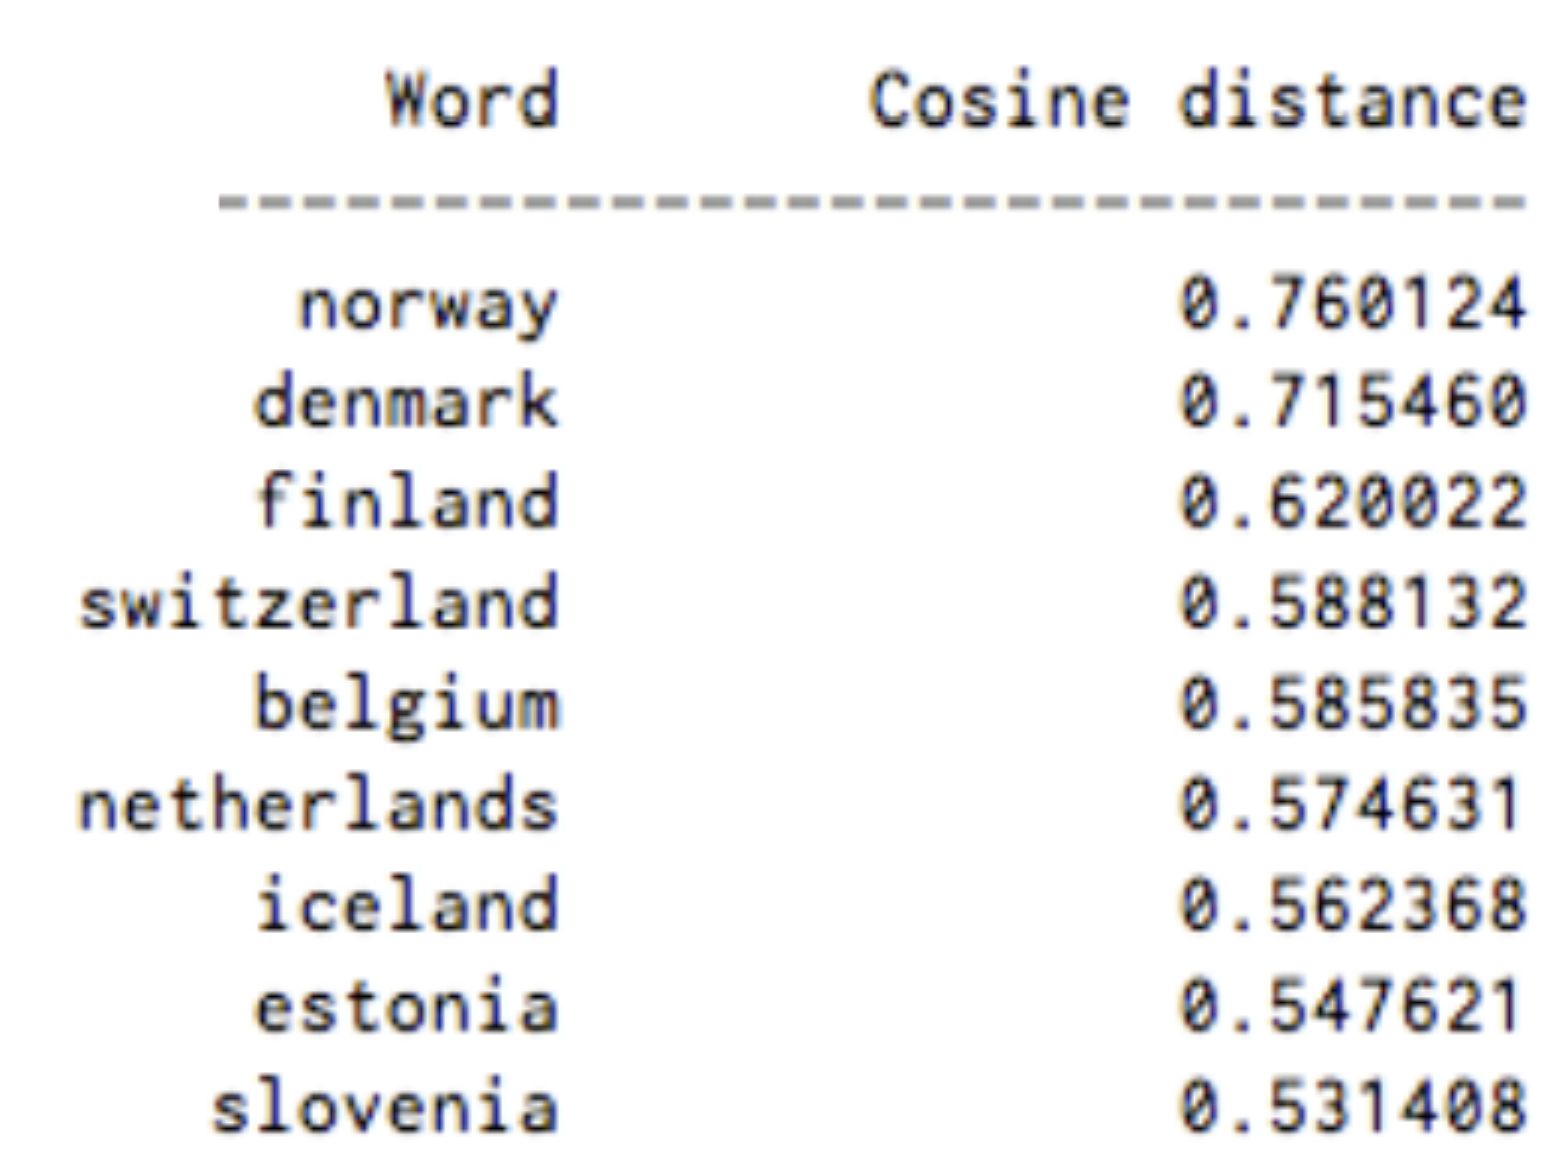

Model architecture:


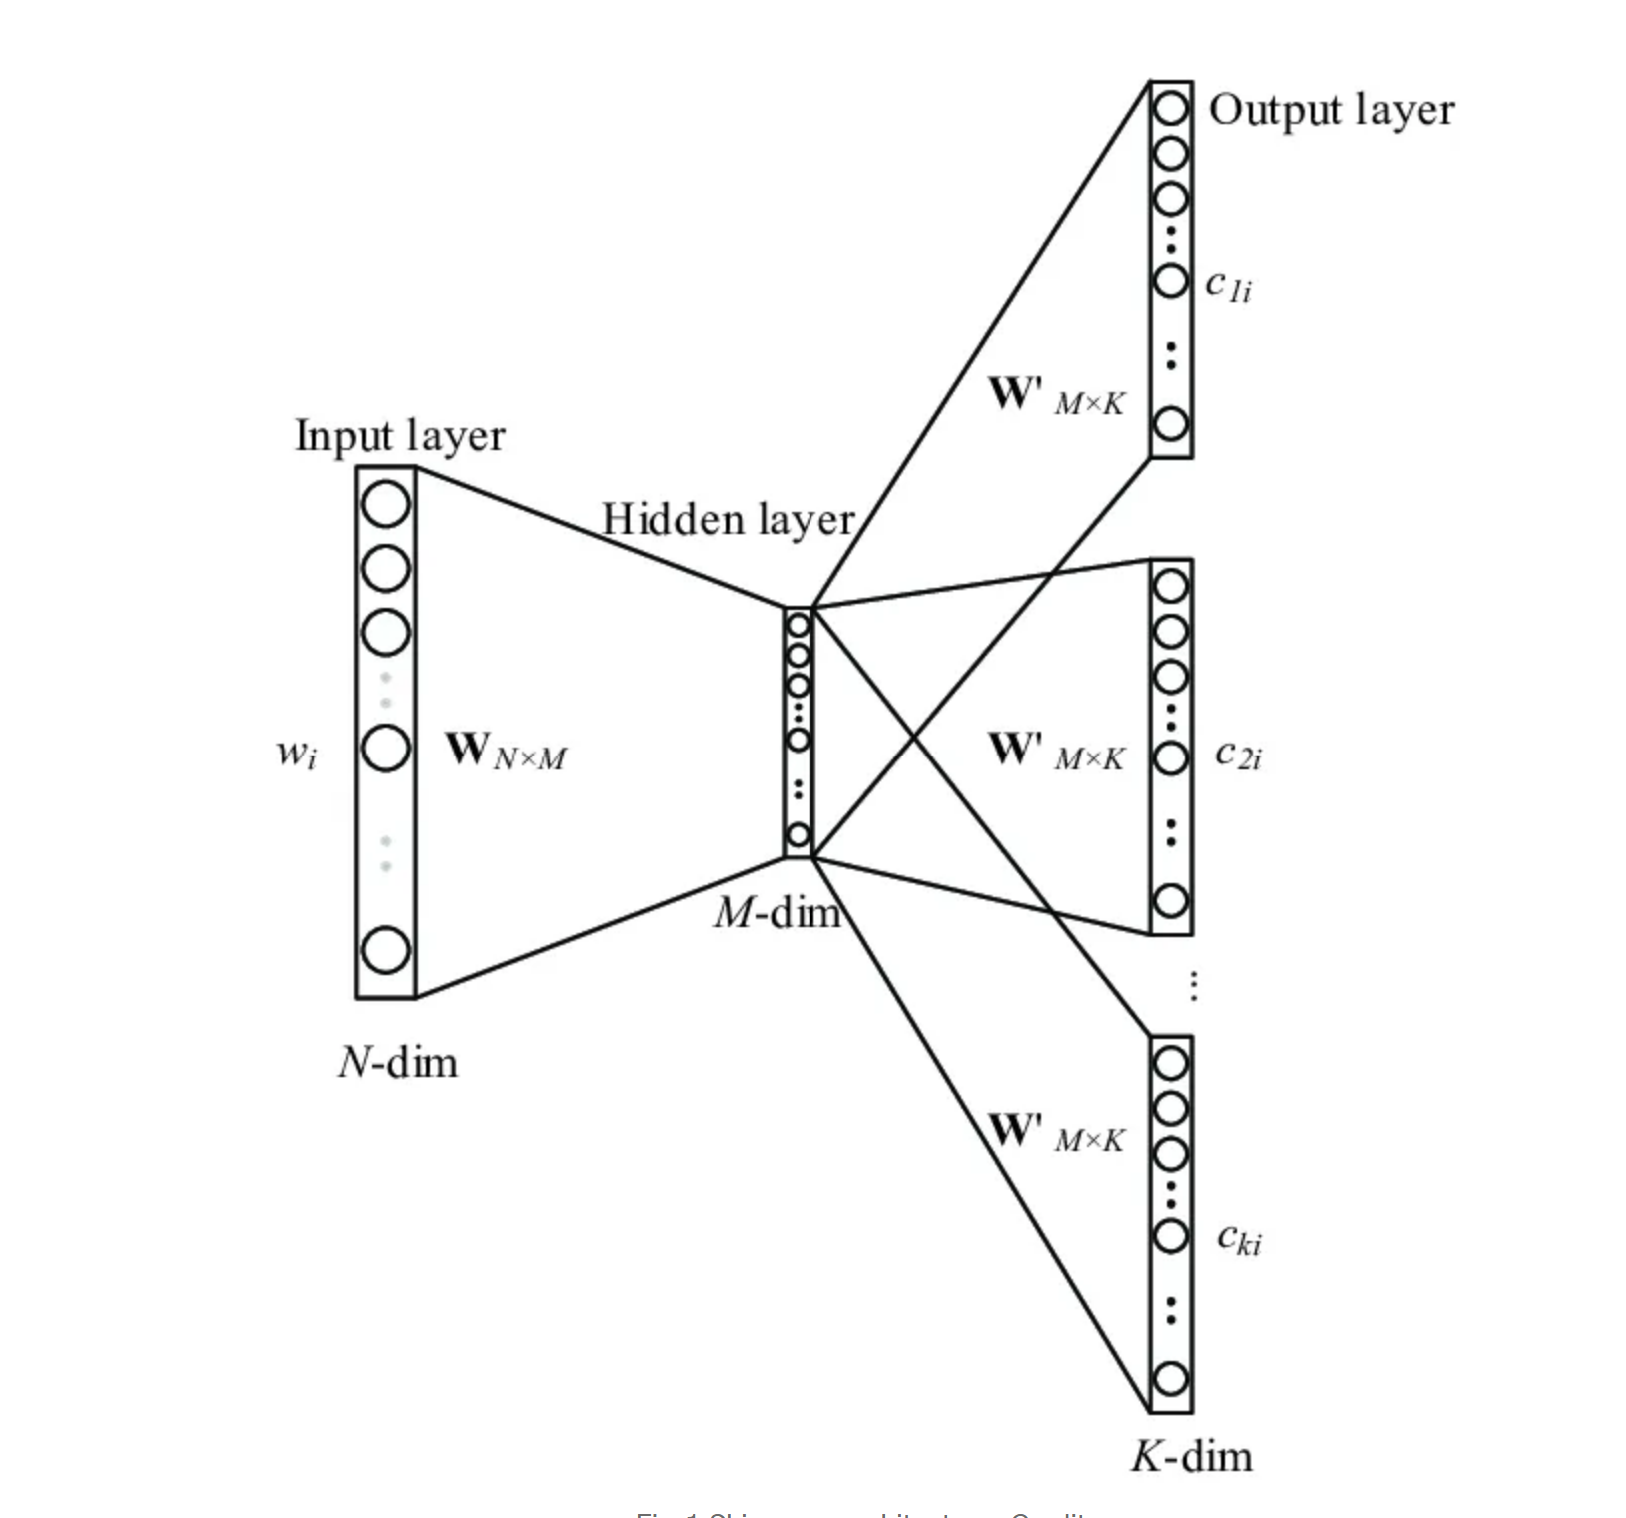

### Implementing a Word2Vec Model



In [ ]:
##installs - only need to run once

!pip install nltk
!pip install gensim

In [ ]:
##imports
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
##downloading data (run once)
%%bash
git clone https://github.com/bdbiworkshops/analysis-nlp.git

Cloning into 'analysis-nlp'...


In [ ]:
##reading the file
file = '/content/analysis-nlp/workshop3.txt'
sample = open(file)
s = sample.read()

In [ ]:
##preprocessing

# Replace \n with space
f = s.replace("\n", " ")
data = []

# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []

    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())

    data.append(temp)

In [ ]:
##creating model and printing results
w2v = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100,
                                             window = 5, sg = 1)

# Print results
print("Cosine similarity between 'alice' " +
          "and 'wonderland': ",
    w2v.wv.similarity('alice', 'wonderland'))

print("Cosine similarity between 'alice' " +
            "and 'machines': ",
      w2v.wv.similarity('alice', 'machines'))

Cosine similarity between 'alice' and 'wonderland':  0.61378974
Cosine similarity between 'alice' and 'machines':  0.77757245
